In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

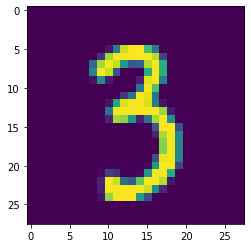

In [10]:
plt.imshow(X_train[98])

In [12]:
X_train = X_train/ 255
X_test = X_test/ 255

In [13]:
X_train[0].max()

1.0

In [16]:
X_train[0].shape

(28, 28)

In [17]:
28*28

784

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [32]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [33]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28, 28]))

In [34]:
model = Sequential([encoder, decoder])
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.5), metrics=['accuracy'])

In [35]:
model.fit(X_train, X_train, epochs=5, validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2536 - accuracy: 0.0821 - val_loss: 0.2168 - val_accuracy: 0.1196
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1891 - accuracy: 0.1551 - val_loss: 0.1725 - val_accuracy: 0.1720
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1625 - accuracy: 0.1953 - val_loss: 0.1553 - val_accuracy: 0.2055
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1523 - accuracy: 0.2100 - val_loss: 0.1462 - val_accuracy: 0.2166
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1444 - accuracy: 0.2213 - val_loss: 0.1402 - val_accuracy: 0.2205


In [36]:
pred = model.predict(X_test[:10])

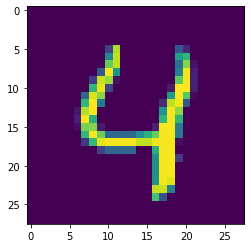

In [37]:
plt.imshow(X_test[4])

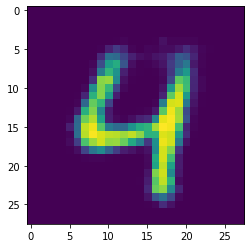

In [38]:
plt.imshow(pred[4])

In [39]:
from tensorflow.keras.layers import GaussianNoise
import tensorflow as tf

In [48]:
sample = GaussianNoise(0.2)

In [40]:
tf.random.set_seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [41]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28, 28]))

In [59]:
model = Sequential([encoder, decoder])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
model.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1720 - accuracy: 0.1803
Epoch 2/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1349 - accuracy: 0.2278
Epoch 3/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1272 - accuracy: 0.2412
Epoch 4/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1201 - accuracy: 0.2525
Epoch 5/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1153 - accuracy: 0.2575
Epoch 6/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1117 - accuracy: 0.2628
Epoch 7/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1092 - accuracy: 0.2673
Epoch 8/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1075 - accuracy: 0.2701


In [61]:
new_image = sample(X_test[:10], training=True)

In [62]:
denoised = model(new_image)

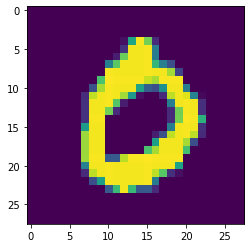

In [63]:
plt.imshow(X_test[3])

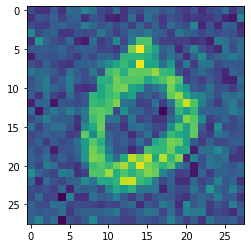

In [64]:
plt.imshow(new_image[3])

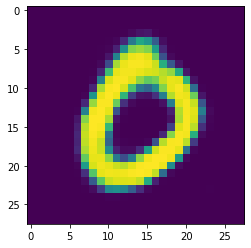

In [65]:
plt.imshow(denoised[3])